In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
sns.set()

# 課題1
## 主成分分析 第二主成分までをプロット

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

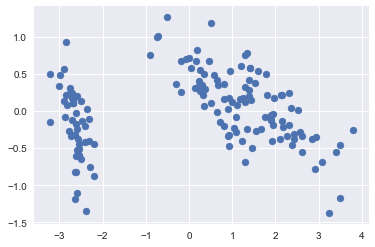

In [16]:
iris = load_iris()
X = iris['data']
X = X - X.mean(axis=0)
sigma = X.T.dot(X) / len(X)
eigenvalue, eigenvectors = np.linalg.eig(sigma)
sorted_index = np.argsort(eigenvalue)[::-1]
eigenvectors = eigenvectors[:, sorted_index][:, :2]
d_reduced_X = X.dot(eigenvectors)
plt.scatter(d_reduced_X[:, 0], d_reduced_X[:, 1])
eigenvectors

array([[ 0.36158968,  0.65653988],
       [-0.08226889,  0.72971237],
       [ 0.85657211, -0.1757674 ],
       [ 0.35884393, -0.07470647]])

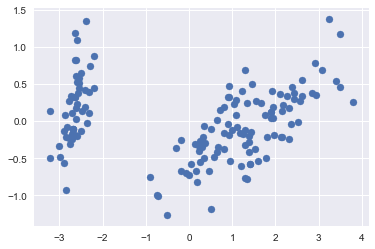

In [14]:
# sklearnのPCAで確かめる
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
sk = pca.fit_transform(X)
plt.scatter(sk[:, 0], sk[:, 1])
pca.components_.T

# 課題2
## 特異値分解
- U : X・X.Tの非ゼロ固有値に対する固有ベクトル
- V : X.T・Xの非ゼロ固有値に対する固有ベクトル
- Λ : X・X.TまたはX.T・Xの非ゼロ固有値の平方根

 X = U・Λ・V.Tとなることを確認

In [5]:
X = np.array([[7, 6, 5], [6, 5, 4], [5, 4, 3]])
U = np.linalg.eig(X.dot(X.T))[1]
V = np.linalg.eig(X.T.dot(X))[1]
eigenvalue = np.linalg.eig(X.dot(X.T))[0]
eigenvalue = np.sort(eigenvalue)[::-1]
L = np.diag(np.sqrt(eigenvalue))

U.dot(L).dot(V.T)

array([[7.28782889, 5.95700794, 4.62618703],
       [5.95700794, 5.0064216 , 4.05583519],
       [4.62618703, 4.05583519, 3.48548338]])